# Project 2:  Choosing a Stock Exchange 

As usual, we will start by importing libraries

In [1]:
# Importing standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
# Importing external libraries
import quandl as ql
import mpl_finance as mpl
import fix_yahoo_finance as yahoo

Setting start and end dates 

In [3]:
startdate = dt.date(2008,4,1)
enddate   = dt.date(2018,3,31)

* Since matplot.finance module has been removed I have used 'fix_yahoo_finance' module that is available here:https://pypi.org/project/fix-yahoo-finance/0.0.11/
* Alternatively, pandas-datareader module could be used; installation instructions available here: https://pandas-datareader.readthedocs.io/en/latest/
* Since we are downloading data from yahoo-free source, I can't guarentee the following code will execute flawlessly everytime. I believe, there would be some limit as to number of times on can invoke API requests. If happens, please find .csv file enclosed along with this file containing the database. In this case, please ignore the following command and follow the command that follows.

In [5]:
# NIFTY 50 index representating India
nifty50 = yahoo.download('^NSEI', start=startdate, end=enddate)
NIFTY50 = nifty50['Adj Close'].asfreq('M').ffill()

# NIKKEI 225 index representating Asian Tigers
N225 = yahoo.download('^N225', start=startdate, end=enddate)
NIKKEI = N225['Adj Close'].asfreq('M').ffill()

# Hang Seng representing China
HS = yahoo.download('^HSCE',start=startdate, end=enddate)
HSCE= HS['Adj Close'].asfreq('M').ffill()

# S&P 500 reoresenting US
GSPC = yahoo.download('^GSPC', start=startdate, end=enddate)
SP500 = GSPC.ix[1:,['Adj Close']].asfreq('M').ffill()

# FTSE 100 representing Europe
FTSE = yahoo.download('^FTSE', start=startdate, end=enddate)
FTSE100 = FTSE.ix[1:,['Adj Close']].asfreq('M').ffill()

/home/neelkanth/yes/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/home/neelkanth/yes/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [11]:
# import os
# loc = os.chdir("/home/neelkanth/Documents/WQU/dataset.csv") # Please change the directory to desired location on your PC
# df = pd.read_csv('dataset.csv', sep=',',names=['NIFTY50','NIKKEI','HSCHE','SP500','FTSE100'],index_col=0)
# data.head()

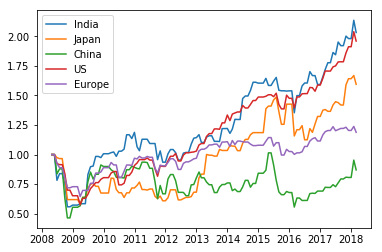

In [12]:
# Concatnating all the Indices and plotting
df = pd.concat((NIFTY50,NIKKEI,HSCE,SP500,FTSE100),axis=1)
plt.plot(df/df.iloc[0,:])
plt.legend(['India','Japan','China','US','Europe'], loc='best')
plt.show()

#### Correlogram 

In [13]:
df_corr = df/df.iloc[0,:]
df_corr.columns = ['India','Japan','China','US','Europe']
correlogram = df_corr.corr()

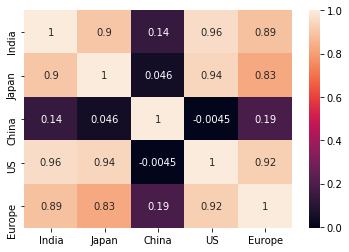

In [14]:
# Plotting heatmap
sns.heatmap(correlogram,annot=True)

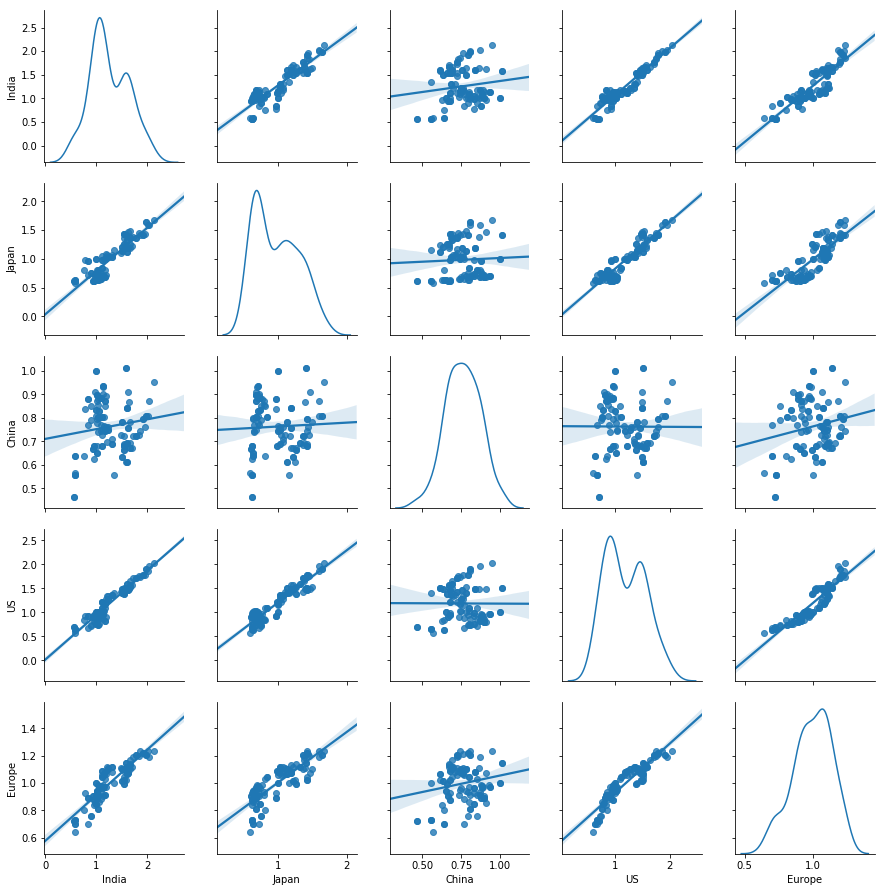

In [15]:
# Plotting pairplots
sns.pairplot(df_corr,diag_kind='kde',kind='reg', palette='husl')